In [1]:
import warnings; warnings.simplefilter('ignore')
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
%load_ext tensorboard
import keras
import keras.backend as K
from keras.callbacks import Callback
from keras.utils import np_utils
from keras.datasets import cifar10
import numpy as np
from keras.optimizers import Adam, SGD
from keras.layers import Input
import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import backend as K
from keras import backend as K
import matplotlib as mpl
K.image_data_format()

# if using google colab
#from google.colab import files


mpl.style.use('classic')

Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
10000 y test shape


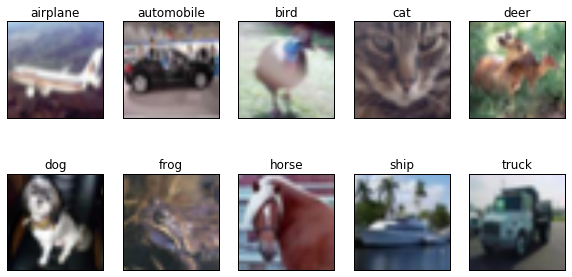

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(y_test.shape[0], 'y test shape')

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

nClasses = 10

fig = plt.figure(figsize=(10,5))
for i in range(nClasses):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [3]:
#normalization
# mean = np.mean(x_train,axis=(0,1,2,3))
# std = np.std(x_train,axis=(0,1,2,3))
# x_train = (x_train-mean)/(std+1e-7)
# x_test = (x_test-mean)/(std+1e-7)

y_train = np_utils.to_categorical(y_train,nClasses)
y_test = np_utils.to_categorical(y_test,nClasses)

# x_train = x_train[0:100]
# x_test = x_test[0:100]
# y_test = y_test[0:100]
# y_train = y_train[0:100]

In [4]:
input_shape = (32,32,3)
logdir = "/Users/avinashshanker/Desktop/cv_asg3/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
file_writer = tf.summary.create_file_writer(logdir + "/metrics")
file_writer.set_as_default()
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [5]:
# from keras.models import Model
# input_img = Input(shape = (32, 32, 3))

# def Inception_Network(input_layer):
#     tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_layer)
#     tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
#     tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_layer)
#     tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)
#     tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_layer)
#     tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)
#     output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)

#     return output

# layer1 = Inception_Network(input_img)
# layer2 = Inception_Network(layer1)
# output = Flatten()(layer2)
# out    = Dense(10, activation='softmax')(output)
# model = Model(inputs = input_img, outputs = out)
# model.summary()
# from keras.optimizers import SGD
# epochs = 5
# lrate = 0.01
# decay = lrate/epochs
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=1000)

In [14]:
K.clear_session()
model = createModel()
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy', 'top_k_categorical_accuracy','mae'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

In [7]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (epoch % 5 == 0):
          print ("Just finished epoch", epoch)
          print ("--------------------------------")
          print ('Loss evaluated on the validation dataset =',
                 logs.get('val_loss'))
          print ('Accuracy reached train is', 
                 logs.get('acc'))
          print ('Accuracy reached Val   is', 
                 logs.get('val_acc'))
          return

In [8]:
#Training
batch_size = 256
epochs = 10
learning_rate = 0.001
lr_callback = keras.callbacks.LearningRateScheduler(learning_rate)
CC = CustomCallback()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(x_test, y_test),
          callbacks = [CC],)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 185s 4ms/step - loss: 2.4960 - accuracy: 0.1398 - top_k_categorical_accuracy: 0.5891 - mae: 0.1781 - val_loss: 2.1233 - val_accuracy: 0.2115 - val_top_k_categorical_accuracy: 0.7403 - val_mae: 0.1737
Just finished epoch 0
--------------------------------
Loss evaluated on the validation dataset = 2.12331746635437
Accuracy reached train is None
Accuracy reached Val   is None
Epoch 2/10
50000/50000 [==============================] - 185s 4ms/step - loss: 2.0011 - accuracy: 0.2239 - top_k_categorical_accuracy: 0.7930 - mae: 0.1677 - val_loss: 1.8305 - val_accuracy: 0.2785 - val_top_k_categorical_accuracy: 0.8395 - val_mae: 0.1623
Epoch 3/10
50000/50000 [==============================] - 196s 4ms/step - loss: 1.8246 - accuracy: 0.2796 - top_k_categorical_accuracy: 0.8416 - mae: 0.1591 - val_loss: 1.6852 - val_accuracy: 0.3465 - val_top_k_categorical_accuracy: 0.8889 - val_mae: 0.1543

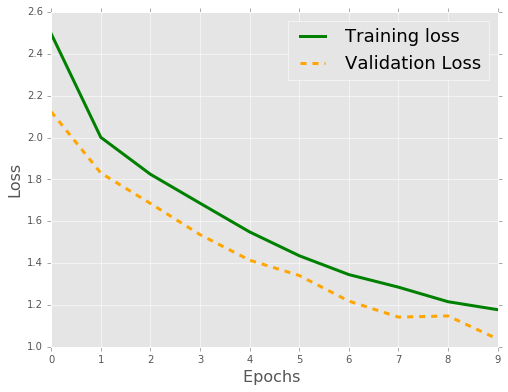

In [9]:
# Loss Curves
mpl.style.use('ggplot')
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'green',linewidth=3.0)
plt.plot(history.history['val_loss'],'orange',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)

plt.savefig('ch3-michelucci-figxx1.png', bbox_inches='tight', dpi = 300)
#files.download('loss.png')

In [15]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 10.00%


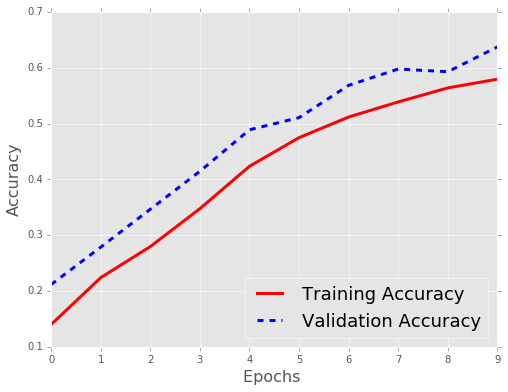

In [11]:
# Accuracy Curves
mpl.style.use('ggplot')
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'red',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'blue',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)

plt.savefig('ch3-michelucci-figxx2.png', bbox_inches='tight', dpi = 300)
#files.download('accuracy.png')

In [12]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
confusion_matrix = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(confusion_matrix)

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[742  43  52   7   9   1  10  12  68  56]
 [ 14 848   0   0   0   1  10   4  20 103]
 [126  10 406  68 169  45  90  47  24  15]
 [ 38  13  88 358  75 160 132  48  28  60]
 [ 56  11 100  41 500   9  82 176  15  10]
 [ 21   7  73 207  85 461  25  90  12  19]
 [ 11   7  37  77  83   2 746  18   6  13]
 [ 21   5  27  37  68  50  13 738   6  35]
 [103  55   8   7   1   2   1   5 767  51]
 [ 21 119   3   5   2   0   4  11  26 809]]


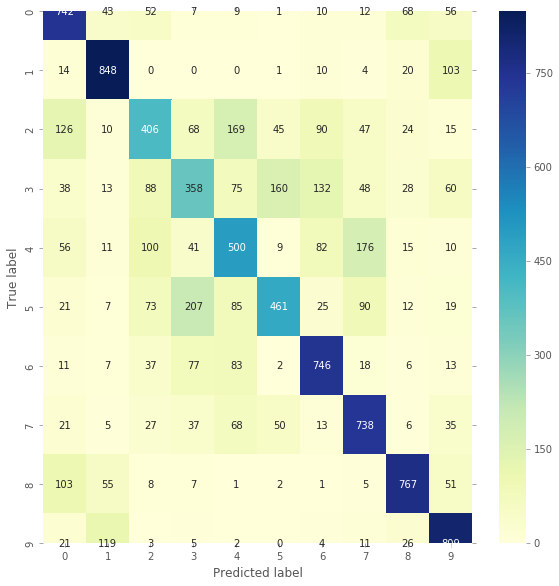

In [16]:
figure = plt.figure(figsize=(8, 8))
import seaborn as sns
sns.heatmap(confusion_matrix,  annot=True, fmt="d", cmap='YlGnBu')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [13]:
%tensorboard --logdir logs